# Weather data
-----------------
## London

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotly import __version__
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
%matplotlib inline

In [2]:
df = pd.read_csv("weatherdata.csv")

In [3]:
df.head()

,yyyy,mm,tmax_C,tmin_C,af,rain_mm,sun_hours,Unnamed: 7
0,1853,1,8.4,2.7,4,62.8,---,NaN
1,1853,2,3.2,-1.8,19,29.3,---,NaN
2,1853,3,7.7,-0.6,20,25.9,---,NaN
3,1853,4,12.6,4.5,0,60.1,---,NaN
4,1853,5,16.8,6.1,0,59.5,---,NaN


In [4]:
# Me livrando da coluna imprestável Unnamed: 7
df.drop("Unnamed: 7", axis=1, inplace=True)

In [5]:
df.head()

,yyyy,mm,tmax_C,tmin_C,af,rain_mm,sun_hours
0,1853,1,8.4,2.7,4,62.8,---
1,1853,2,3.2,-1.8,19,29.3,---
2,1853,3,7.7,-0.6,20,25.9,---
3,1853,4,12.6,4.5,0,60.1,---
4,1853,5,16.8,6.1,0,59.5,---


In [6]:
df[["tmax_C", "tmin_C", "af", "rain_mm"]].head()

,tmax_C,tmin_C,af,rain_mm
0,8.4,2.7,4,62.8
1,3.2,-1.8,19,29.3
2,7.7,-0.6,20,25.9
3,12.6,4.5,0,60.1
4,16.8,6.1,0,59.5


In [7]:
mapping = {'---': np.nan}
df.replace(mapping, inplace=True)

In [8]:
df.head()

,yyyy,mm,tmax_C,tmin_C,af,rain_mm,sun_hours
0,1853,1,8.4,2.7,4,62.8,NaN
1,1853,2,3.2,-1.8,19,29.3,NaN
2,1853,3,7.7,-0.6,20,25.9,NaN
3,1853,4,12.6,4.5,0,60.1,NaN
4,1853,5,16.8,6.1,0,59.5,NaN


In [9]:
df["tmin_C"] = pd.to_numeric(df["tmin_C"])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 7 columns):
yyyy         1991 non-null int64
mm           1991 non-null int64
tmax_C       1991 non-null float64
tmin_C       1990 non-null float64
af           1990 non-null object
rain_mm      1991 non-null float64
sun_hours    1079 non-null object
dtypes: float64(3), int64(2), object(2)
memory usage: 109.0+ KB


In [11]:
df["af"] = pd.to_numeric(df["af"])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 7 columns):
yyyy         1991 non-null int64
mm           1991 non-null int64
tmax_C       1991 non-null float64
tmin_C       1990 non-null float64
af           1990 non-null float64
rain_mm      1991 non-null float64
sun_hours    1079 non-null object
dtypes: float64(4), int64(2), object(1)
memory usage: 109.0+ KB


In [13]:
df["sun_hours"] = pd.to_numeric(df["sun_hours"])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 7 columns):
yyyy         1991 non-null int64
mm           1991 non-null int64
tmax_C       1991 non-null float64
tmin_C       1990 non-null float64
af           1990 non-null float64
rain_mm      1991 non-null float64
sun_hours    1079 non-null float64
dtypes: float64(5), int64(2)
memory usage: 109.0 KB


In [15]:
months = {1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5:"May", 6:"Jun", 7:"Jul", 8:"Aug", 9:"Sep", 10:"Oct", 11:"Nov", 12:"Dec"}

In [16]:
months

{1: 'Jan',
 2: 'Feb',
 3: 'Mar',
 4: 'Apr',
 5: 'May',
 6: 'Jun',
 7: 'Jul',
 8: 'Aug',
 9: 'Sep',
 10: 'Oct',
 11: 'Nov',
 12: 'Dec'}

In [17]:
df["mm"].replace(months, inplace=True)

In [18]:
df.to_csv("weather_corrected.csv")

/home/henrique/bin/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



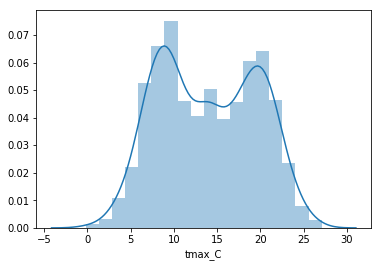

In [19]:
sns.distplot(df["tmax_C"])

/home/henrique/bin/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



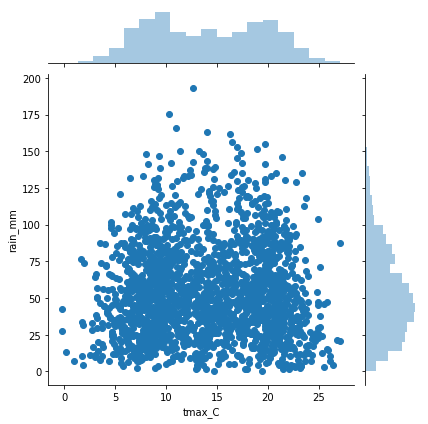

In [20]:
sns.jointplot(x="tmax_C", y="rain_mm", data=df)

/home/henrique/bin/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



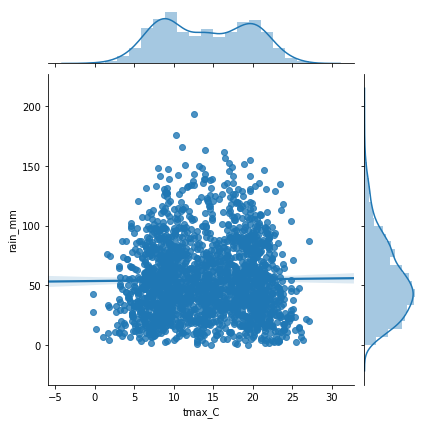

In [21]:
sns.jointplot(x="tmax_C", y="rain_mm", data=df, kind="reg")

/home/henrique/bin/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning:

invalid value encountered in greater_equal

/home/henrique/bin/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning:

invalid value encountered in less_equal



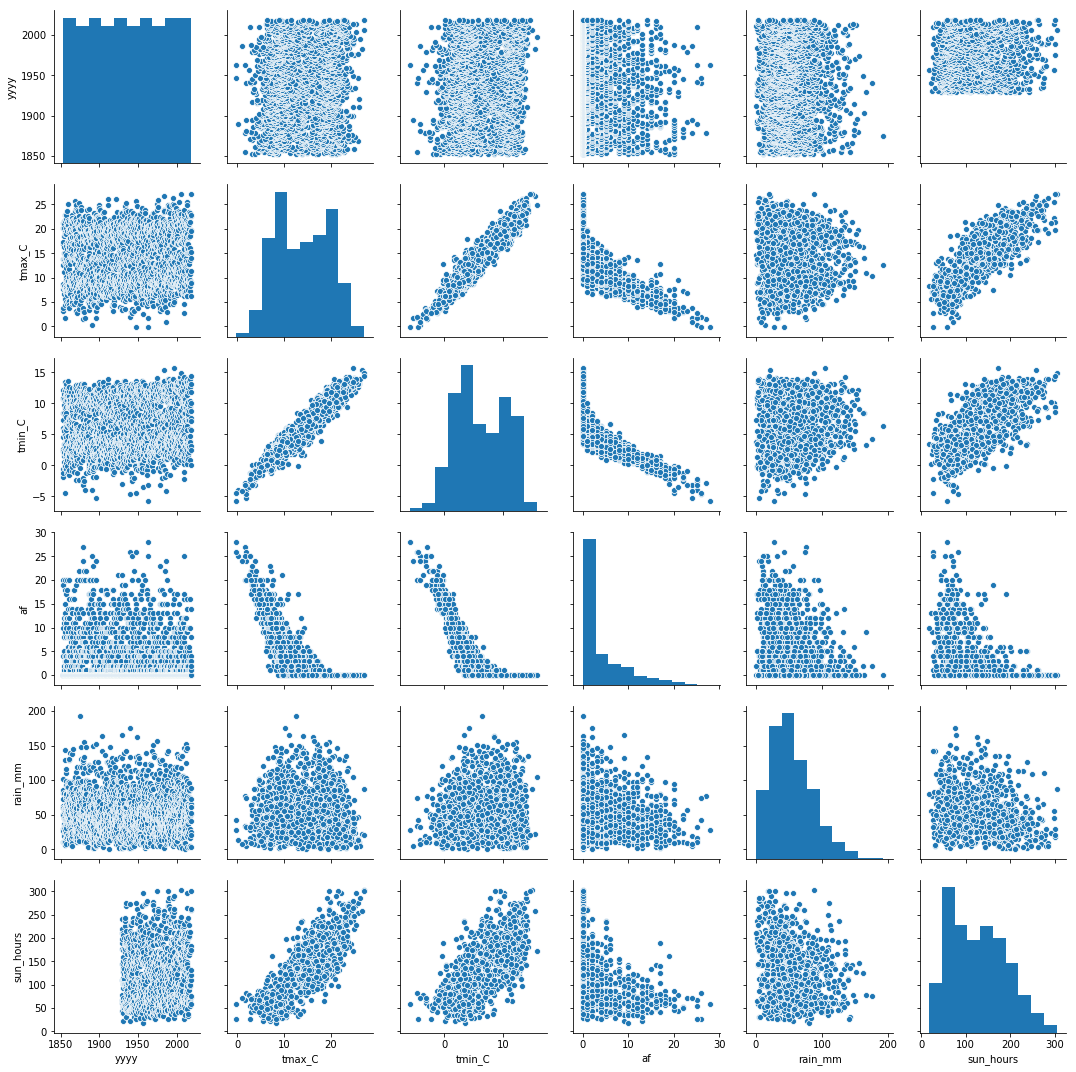

In [22]:
sns.pairplot(df)

/home/henrique/bin/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



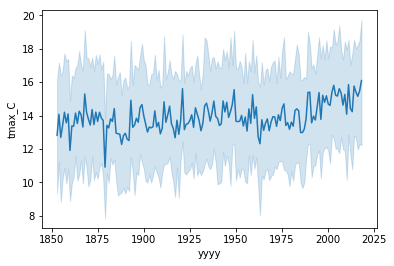

In [23]:
sns.lineplot(x="yyyy", y="tmax_C", data=df)

/home/henrique/bin/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



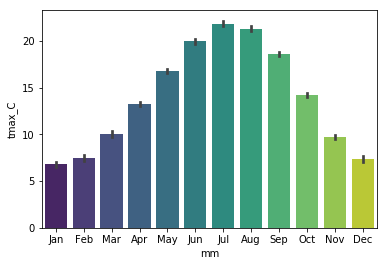

In [24]:
sns.barplot(x="mm", y="tmax_C", data=df, estimator=np.mean, palette="viridis")

In [25]:
dfcorr = df.corr()

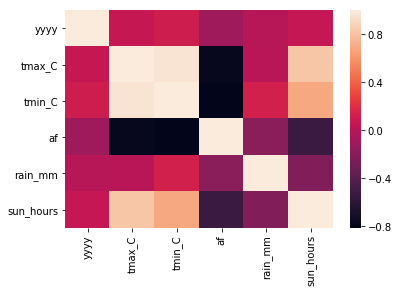

In [26]:
sns.heatmap(dfcorr)

In [30]:
weather = df.pivot_table(index=(df[df["yyyy"] >= 2000]["yyyy"]), columns="mm", values="tmin_C")

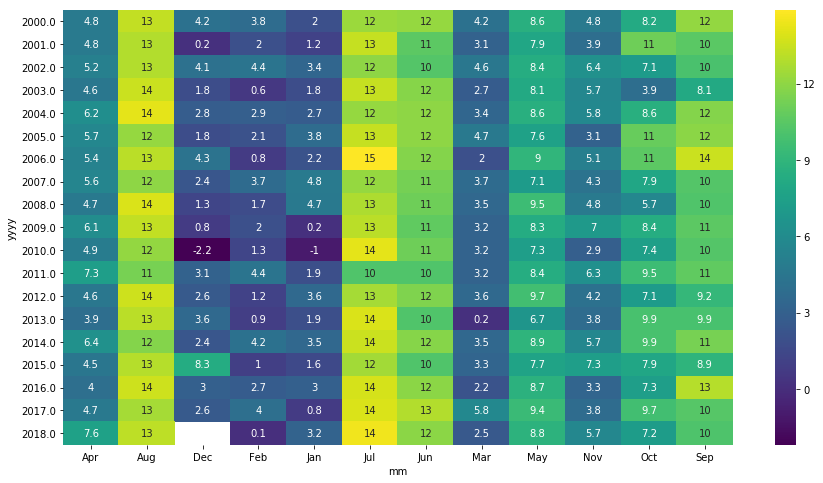

In [31]:
plt.figure(figsize=(15,8))
sns.heatmap(weather, cmap="viridis", annot=True)

/home/henrique/bin/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



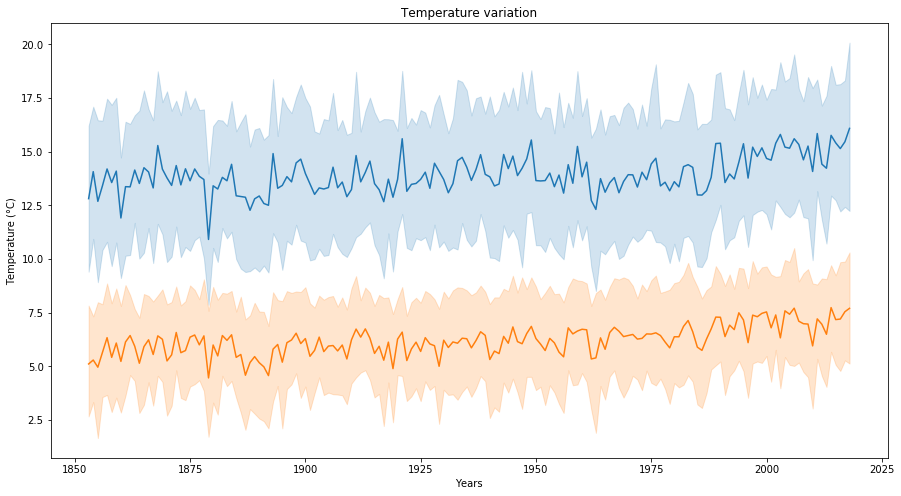

In [29]:
plt.figure(figsize=(15,8))
sns.lineplot(x="yyyy", y="tmax_C", data=df)
sns.lineplot(x="yyyy", y="tmin_C", data=df)
plt.xlabel('Years')
plt.ylabel('Temperature (°C)')
plt.title("Temperature variation")
plt.savefig("lineplot.png")